<a href="https://colab.research.google.com/github/satyhim/Projects/blob/main/NLP_Sentiment_Analysis_Tweeter_Data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis : Tweeter Data

#Problem Statement:

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiments associalted with it. so the task is to classify racist or sexist tweets from the other tweets.


Formally, given a training sample of tweets and label, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the given test dataset.

In [59]:
import pandas as pd
import numpy as np
import re
import nltk
import warnings
import seaborn as sns
import matplotlib.pyplot as plt


In [60]:
df_train=pd.read_csv('/content/drive/MyDrive/Python/Project/Sentiment_analysis/Train_tweets.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Python/Project/Sentiment_analysis/Test_tweets.csv')


In [61]:
df_train.shape

(31962, 3)

In [62]:
df_train.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [63]:
df_test.shape

(17197, 2)

In [64]:
df_test.columns

Index(['id', 'tweet'], dtype='object')

In [65]:
df_train.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [66]:
df_test.isna().sum()

id       0
tweet    0
dtype: int64

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [68]:
df_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [69]:
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [70]:
df_train['label'].unique()

array([0, 1])

Now we will check out some non racist/sexist tweets : 

In [71]:
df_train[df_train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


Now we will check out some racist/sexist tweets :

In [72]:
df_train[df_train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


Now we can see there are many words and characters which are not required in the tweets for our analysis.

Lets check label distribution in the dataset:

In [73]:
df_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

So we can see there are 29720 tweets are non racist/sexist and only 2242 tweets are racist/sexist tweets.

Checking length disrtibution of words in the tweets in both train and test data:

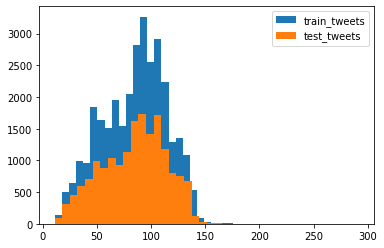

In [74]:
length_train=df_train['tweet'].str.len()
length_test=df_test['tweet'].str.len()
plt.hist(length_train, bins=40, label="train_tweets")
plt.hist(length_test, bins=40, label="test_tweets")
plt.legend()
plt.show()

#Data Cleaning

Before we begin cleaning, let's first combine train and test datasets. Combining the datasets will make it convenient for us to preprocess the data. Later we will split it back into train and test data.

In [75]:
df = df_train.append(df_test, ignore_index=True, sort=False)
df.shape

(49159, 3)

Given below is a user-defined function to remove unwanted text patterns from tweets.

In [76]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

**1. Removing Twitter Handles (@user)**

In [77]:
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


**2. Removing Punctuations, Numbers, and Special Characters**

Here we will replace everything except characters and hashtags with spaces. The regular expression "[^a-zA-Z#]" means anything except alphabets and '#'

In [78]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


**3.Removing Short Words**

We have to be a little careful here in selecting the length of the words which we want to remove . So , I have decided to remove all the words having length 3 or less . For example , terms like " hmm " , " oh " are of very little use . It is better to get rid of them .

In [80]:
df['tidy_tweet'] =df['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3])) 
df

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid #hairflip #neverready #fo...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today #ohio used words li...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy work conference right mindset leads cult...


We can see the difference between the raw tweets and the cleaned tweets (tidy_tweet) quite clearly. Only the important words in the tweets have been retained and the noise (numbers, punctuations, and special characters) has been removed.

**4. Text Normalization**

Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [81]:
tokenized_tweet =df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

Now we can normalize the tokenized tweets:

In [82]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])  #  stemming

Now let's stitch these tokens back together. It can easily be done using nltk's MosesDetokenizer function:

In [83]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]  = ' '.join(tokenized_tweet[i])

df['tidy_tweet'] = tokenized_tweet    
df.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


#Visualization from Tweets:

**A) Understanding the common words used in the tweets: WordCloud**

In [84]:
all_words = ' '.join([text for text in df['tidy_tweet']]) 

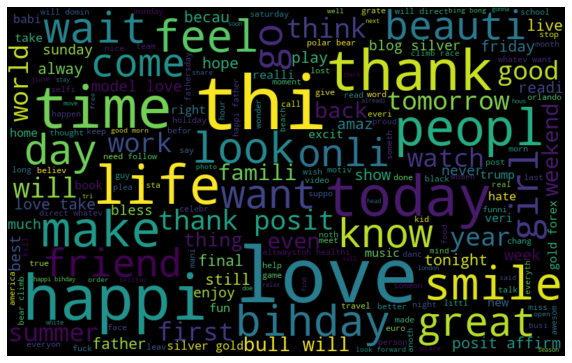

In [85]:
 from wordcloud import WordCloud
 wordcloud = WordCloud(width=800, height=500, random_state=21,
                      max_font_size=110).generate(all_words)
 plt.figure(figsize=(10,7))
 plt.imshow(wordcloud,interpolation="bilinear") 
 plt.axis('off')
 plt.show()                                                     

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn't give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

**B) Words in non racist/sexist tweets**

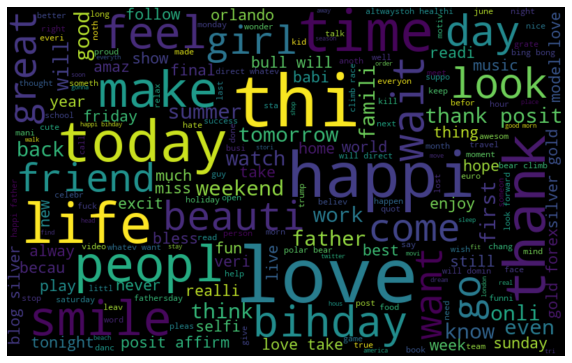

In [86]:
normal_words = ' '.join([text for text in df['tidy_tweet'] [df['label'] == 0]])

wordcloud = WordCloud (width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt .axis('off')
plt.show()


Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

**C) Racist/Sexist Tweets:**

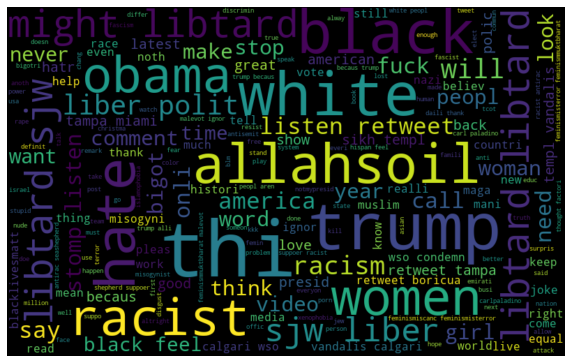

In [87]:
negative_words = ' ' .join([text for text in df['tidy_tweet'] [df['label'] == 1]]) 
wordcloud = WordCloud (width=800, height=500, random_state=21, max_font_size=110).generate ( negative_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

**D) Understanding the impact of Hashtags on tweets sentiment:**


Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

For instance, given below is a tweet from our dataset:

**"what has today's attitude to women got in common with that of norman bates? #psycho #feminism #hollaback"**

The tweet seems sexist in nature and the Hashtags in the tweet convey the same feeling.

We will store all the trend terms in two separate lists - one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [88]:
def hashtag_extract(x):
    hashtags = []   # Loop over the words in the tweet 
    for i in x:
       ht = re.findall(r"#(\w+)", i)
       hashtags.append(ht) 
    return hashtags

# extracting hashtags from noh racist/sexist tweets
HT_regular = hashtag_extract(df['tidy_tweet'][df['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative=hashtag_extract(df['tidy_tweet'][df['label'] == 1]) 
#unnesting list 
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

**Non Racist/sexist tweets:**

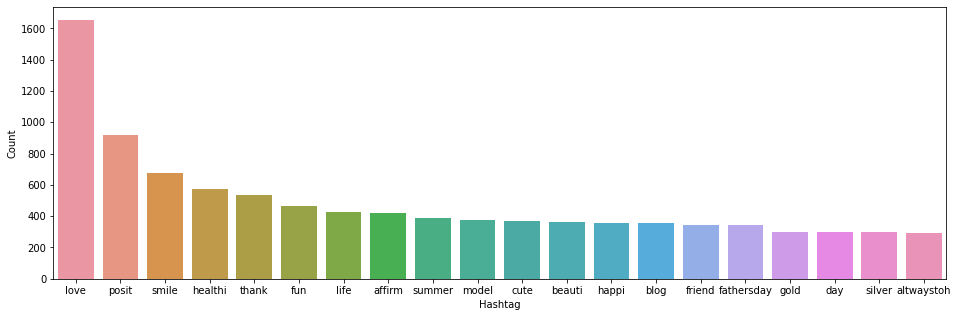

In [89]:
a = nltk.FreqDist (HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

 # selecting top 20 most frequent hashtags d

d=d.nlargest (columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x="Hashtag", y = "Count") 
ax. set(ylabel = 'Count') 
plt.show()

All the hashtags are positive and it make sense. I am expecting negative terms in the plots of the second list. Lets check the most frequent hastags appering  in the racist or sexist tweets:

**Racist/sexist tweets:**

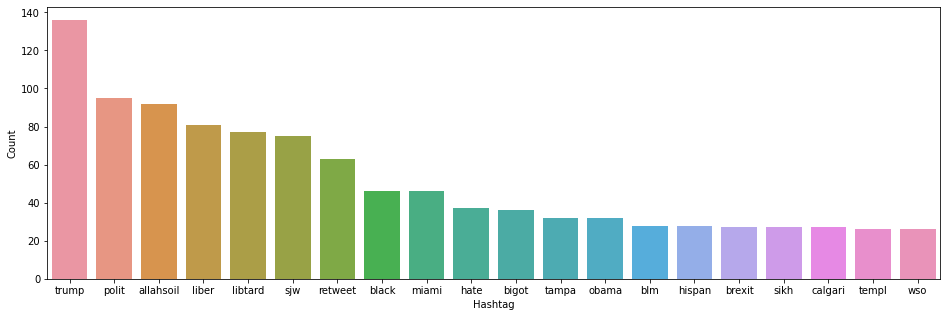

In [90]:
b=nltk.FreqDist(HT_negative)
e=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})

e=e.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x="Hashtag", y = "Count") 
ax. set(ylabel = 'Count') 
plt.show()

As expected most of the terms are negative with a few neutral terms as well. So its nit a bad idea to keep these hashtags in our data as they contain useful information. 

Next we will try to extract features from the tokenized tweets.